In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from weather.config import WEATHER_DATA
import polars as pl
import altair as alt


from weather.helpers.epw_read import read_epw
from datetime import datetime


In [3]:
wfile = WEATHER_DATA / "CA_PALO-ALTO-AP_724937S_20.epw"

In [4]:
df = read_epw(wfile)
df

datetime,Dry Bulb Temperature,Dew Point Temperature,Relative Humidity,Extraterrestrial Horizontal Radiation,Extraterrestrial Direct Normal Radiation,Horizontal Infrared Radiation Intensity,Global Horizontal Radiation,Direct Normal Radiation,Diffuse Horizontal Radiation,Global Horizontal Illuminance,Direct Normal Illuminance,Diffuse Horizontal Illuminance,Zenith Luminance,Wind Direction,Wind Speed,Total Sky Cover,Opaque Sky Cover (used if Horizontal IR Intensity missing),Visibility,Ceiling Height,Present Weather Observation,Precipitable Water,Aerosol Optical Depth,Snow Depth,Days Since Last Snowfall,Albedo,Liquid Precipitation Depth,Liquid Precipitation Quantity
datetime[μs],f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64,f64,i64,i64,i64,f64,i64,i64,f64,f64,f64
2020-01-01 00:00:00,7.2,5.6,90,0,0,298,0,0,0,0,0,0,0,320,1.2,5,5,16.1,5067,9,139,0.0,0,88,999.0,0.0,1.0
2020-01-01 01:00:00,7.0,5.5,90,0,0,297,0,0,0,0,0,0,0,320,1.0,5,5,16.1,4824,9,139,0.0,0,88,999.0,0.0,1.0
2020-01-01 02:00:00,6.8,5.4,91,0,0,296,0,0,0,0,0,0,0,160,0.8,5,5,16.1,4580,9,139,0.0,0,88,999.0,0.0,1.0
2020-01-01 03:00:00,6.6,5.3,91,0,0,295,0,0,0,0,0,0,0,160,0.6,5,5,16.1,4336,9,129,0.0,0,88,999.0,0.0,1.0
2020-01-01 04:00:00,6.4,5.2,92,0,0,294,0,0,0,0,0,0,0,160,0.4,5,5,16.1,4092,9,129,0.0,0,88,999.0,0.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2020-12-31 19:00:00,14.0,6.0,59,0,0,310,0,0,0,0,0,0,0,300,6.2,0,0,16.1,77777,9,139,0.0,0,88,999.0,0.0,1.0
2020-12-31 20:00:00,14.0,6.0,59,0,0,310,0,0,0,0,0,0,0,300,6.2,0,0,16.1,77777,9,139,0.0,0,88,999.0,0.0,1.0
2020-12-31 21:00:00,14.0,6.0,59,0,0,310,0,0,0,0,0,0,0,300,6.2,0,0,16.1,77777,9,139,0.0,0,88,999.0,0.0,1.0


In [5]:
n_days = 4
df_june = df.filter(
    pl.col("datetime").is_between(datetime(2020, 6, 1), datetime(2020, 6, n_days))
)
df_july = df.filter(
    pl.col("datetime").is_between(datetime(2020, 7, 1), datetime(2020, 7, n_days))
)
df_aug = df.filter(
    pl.col("datetime").is_between(datetime(2020, 8, 1), datetime(2020, 8, n_days))
)

In [6]:
# a few days in july.. 
june = alt.Chart(df_june).mark_line().encode(
    x="datetime:T",
    y="Dry Bulb Temperature"
)
july = alt.Chart(df_july).mark_line().encode(
    x="datetime:T",
    y="Dry Bulb Temperature"
)
aug = alt.Chart(df_aug).mark_line().encode(
    x="datetime:T",
    y="Dry Bulb Temperature"
)

june | july | aug

alt.HConcatChart(...)

### denoise and try to fit periodic signal.. 

In [7]:
from statsmodels.tsa import seasonal

In [12]:
sdf = df_june.select(["datetime", "Dry Bulb Temperature"]).to_pandas().set_index("datetime")
sdf

,Dry Bulb Temperature
datetime,
2020-06-01 00:00:00,16.0
2020-06-01 01:00:00,15.8
2020-06-01 02:00:00,15.5
2020-06-01 03:00:00,15.3
2020-06-01 04:00:00,15.1
...,...
2020-06-03 20:00:00,23.9
2020-06-03 21:00:00,23.1
2020-06-03 22:00:00,22.4


In [29]:
nix_df = df_june.select(["Dry Bulb Temperature"]).to_pandas()
nix_df.head()

,Dry Bulb Temperature
0,16.0
1,15.8
2,15.5
3,15.3
4,15.1


In [20]:
r = seasonal.seasonal_decompose(sdf, model="multiplicative")
r

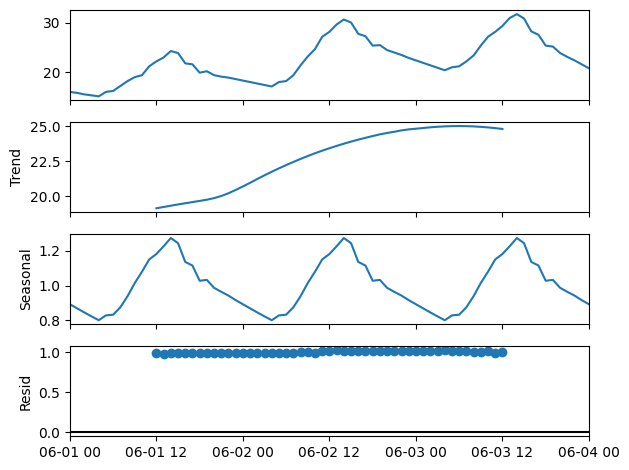

In [55]:
r.plot();

datetime
2020-06-01 00:00:00   NaN
2020-06-01 01:00:00   NaN
2020-06-01 02:00:00   NaN
2020-06-01 03:00:00   NaN
2020-06-01 04:00:00   NaN
                       ..
2020-06-03 20:00:00   NaN
2020-06-03 21:00:00   NaN
2020-06-03 22:00:00   NaN
2020-06-03 23:00:00   NaN
2020-06-04 00:00:00   NaN
Name: trend, Length: 73, dtype: float64

In [22]:
r.seasonal

datetime
2020-06-01 00:00:00    0.892519
2020-06-01 01:00:00    0.868806
2020-06-01 02:00:00    0.845328
2020-06-01 03:00:00    0.822583
2020-06-01 04:00:00    0.800518
                         ...   
2020-06-03 20:00:00    0.987206
2020-06-03 21:00:00    0.964030
2020-06-03 22:00:00    0.942375
2020-06-03 23:00:00    0.916168
2020-06-04 00:00:00    0.892519
Name: seasonal, Length: 73, dtype: float64

In [23]:
import numpy, scipy.optimize


In [ ]:
def test_func(x, a, b):
    return a * np.sin(b * x)


params, params_covariance = scipy.optimize.curve_fit(
    test_func, x_data, y_data, p0=[2, 2]
)

In [25]:


def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [31]:
fit_res = fit_sin(nix_df.index, nix_df["Dry Bulb Temperature"])
fit_res

{'amp': np.float64(-4.776467860735568),
 'omega': np.float64(0.26510436655784375),
 'phase': np.float64(0.7375111252653489),
 'offset': np.float64(22.49035708173425),
 'freq': np.float64(0.04219267037292659),
 'period': np.float64(23.700799005167056),
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': np.float64(0.2140306967013124),
 'rawres': (array([ 6.13835785,  0.25821309,  0.        , 22.39726027]),
  array([-4.77646786,  0.26510437,  0.73751113, 22.49035708]),
  array([[ 2.14030697e-01,  9.37248831e-06,  7.41881250e-04,
          -3.96589115e-03],
         [ 9.37248831e-06,  2.23036998e-05, -8.36875556e-04,
           2.84201869e-04],
         [ 7.41881250e-04, -8.36875556e-04,  4.08477836e-02,
          -9.92220278e-03],
         [-3.96589115e-03,  2.84201869e-04, -9.92220278e-03,
           1.11011935e-01]]))}

In [49]:
fitted_data = fit_res["fitfunc"](nix_df.index)

In [66]:
fit_df_june = (
    df_june.select(["datetime", "Dry Bulb Temperature"])
    .with_columns(pl.Series("fit", fitted_data.to_list()), pl.Series("trend", r.trend))
    .with_columns(pl.col("trend").fill_null(strategy="zero"))
    .with_columns(trend_norm = (pl.col("trend") - pl.col("trend").min()) / (pl.col("trend").max() - pl.col("trend").min()))
    .with_columns(trended_fit=(pl.col("trend_norm") + pl.col("fit")))
)
fit_df_june

datetime,Dry Bulb Temperature,fit,trend,trend_norm,trended_fit
datetime[μs],f64,f64,f64,f64,f64
2020-06-01 00:00:00,16.0,19.278431,0.0,0.0,19.278431
2020-06-01 01:00:00,15.8,18.464362,0.0,0.0,18.464362
2020-06-01 02:00:00,15.5,17.931587,0.0,0.0,17.931587
2020-06-01 03:00:00,15.3,17.717332,0.0,0.0,17.717332
2020-06-01 04:00:00,15.1,17.836567,0.0,0.0,17.836567
…,…,…,…,…,…
2020-06-03 20:00:00,23.9,22.89562,0.0,0.0,22.89562
2020-06-03 21:00:00,23.1,21.634493,0.0,0.0,21.634493
2020-06-03 22:00:00,22.4,20.433164,0.0,0.0,20.433164


In [67]:
base = alt.Chart(fit_df_june).encode(
    x="datetime:T",
)

real = base.mark_circle().encode(y="Dry Bulb Temperature")
fit_chart = base.mark_line().encode(y="fit", color=alt.value("red"))
fit_chart2 = base.mark_line().encode(y="trended_fit", color=alt.value("green"))

real + fit_chart + fit_chart2

alt.LayerChart(...)

Index([19.278431445757995,  18.46436182674191, 17.931587199366575,
        17.71733235523305, 17.836567211286667, 18.280960866542056,
        19.01946367945152,  20.00047669635845, 21.155456853768655,
       22.403706060118047, 23.658009545436336,  24.83072952923185,
       25.839928443985183, 26.615093886598654, 27.102065297287755,
       27.266818140447484,   27.0978411879953, 26.606940805169366,
       25.828416043592316, 24.816662177582558,  23.64237012385908,
        22.38758728996076,  21.13998494831017, 19.986732672649442,
        19.00840782800141,  18.27336565613043,  17.83296331681847,
       17.717971579653916,  17.93642488027212,  18.47305995692554,
       19.290382289665562, 20.331285830373815, 21.523042983949626,
       22.782386061953165, 24.021325169175142,  25.15329602927242,
        26.09920820287255, 26.792971111096755,  27.18611176301748,
       27.251161547920756, 26.983575458288776, 26.402049648011154,
        25.54721513813494, 24.478798940511858,  23.27145095071

In [ ]:
Fyy = abs(numpy.fft.fft(yy))
guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1]) 

In [ ]:
# could try to smooth more, or just go for summation.. 

### looking at month

In [17]:
month = 6
n_days = 30
alt.Chart(
    df.filter(
        pl.col("datetime").is_between(
            datetime(2020, month, 1), datetime(2020, month, n_days))
    )
).mark_line().encode(x="datetime:T", y="Dry Bulb Temperature")

alt.Chart(...)

In [18]:
month = 7
n_days = 30
alt.Chart(
    df.filter(
        pl.col("datetime").is_between(
            datetime(2020, month, 1), datetime(2020, month, n_days))
    )
).mark_line().encode(x="datetime:T", y="Dry Bulb Temperature")

alt.Chart(...)